In [1]:
# # Default style
# %matplotlib inline
# from matplotlib import style
# style.use('fivethirtyeight')

#Import the dependences
import numpy as np
import pandas as pd
import datetime 
import plotly.express as px

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Python SQL toolkit and Object Relational Mapper (ORM)
# import sqlalchemy
# from sqlalchemy.ext.automap import automap_base
# from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, text, func, DateTime, Column

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Create engine using the `starbucks_store_locations.sqlite` database file
engine = create_engine("sqlite:///starbucks_store_locations.sqlite")

In [3]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

starbucks_store_locations
--------
store_number TEXT
city TEXT
state_province TEXT
country TEXT
longitude FLOAT
latitude FLOAT
region TEXT



In [4]:
# RAW SQL / Pandas
conn = engine.connect() 

In [5]:
# check the data in the table station (just for viewing)
query = text("""Select * FROM starbucks_store_locations LIMIT 2""")
df = pd.read_sql(query, con=conn)
df

,store_number,city,state_province,country,longitude,latitude,region
0,47370-257954,Andorra la Vella,7,AD,1.53,42.51,Europe
1,22331-212325,Ajman,AJ,AE,55.47,25.42,Asia


In [6]:
query = text("""SELECT
                state_province,
                COUNT (store_number) AS store_count
           FROM
                starbucks_store_locations
           WHERE
                country = 'US'
           GROUP BY
                state_province
           ORDER BY
                state_province ASC;""")
df1 = pd.read_sql(query, con=conn)
df1

,state_province,store_count
0,AK,49
1,AL,85
2,AR,55
3,AZ,488
4,CA,2821
5,CO,481
6,CT,123
7,DC,91
8,DE,25
9,FL,694


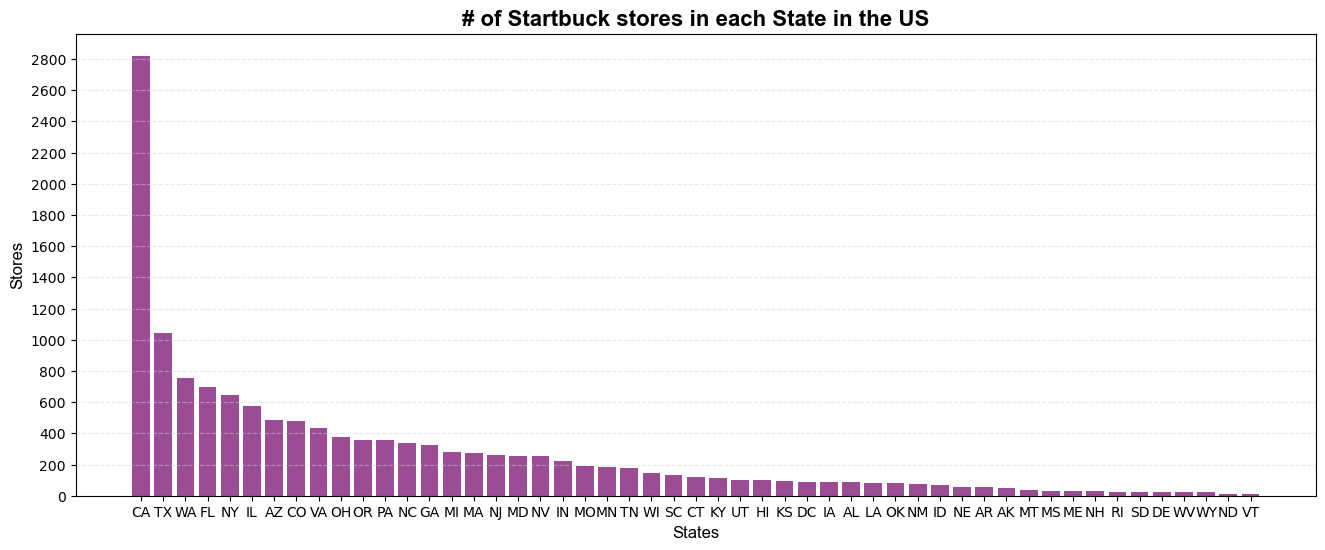

In [72]:
# Sort DataFrame by store count in descending order
df1 = df1.sort_values(by="store_count", ascending=False)

# Change Canvas Size
plt.figure(figsize=(16, 6))

# Create a basic plot
plt.bar(df1['state_province'], df1['store_count'], color="#9A4C95", align="center")

plt.xlabel("States", fontfamily="Arial", fontsize=12)
plt.ylabel("Stores", fontfamily="Arial", fontsize=12)
plt.title("# of Startbuck stores in each State in the US", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 350)
plt.yticks(np.arange(0, 3000, 200)) 

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.50)

# Show/Save the Graph
plt.show()

In [8]:
query = text("""SELECT 
                store_number,
                country,
                city,
                longitude,
                latitude
            FROM 
                starbucks_store_locations 
            GROUP BY 
                state_province
            ORDER BY 
                state_province  ASC;""")
df2 = pd.read_sql(query, con=conn)
df2

,store_number,country,city,longitude,latitude
0,25078-237919,PH,Las Pinas,121.00,14.44
1,27879-249085,CY,Nicosia,33.32,35.16
2,1832-138646,JP,Annaka,138.74,36.34
3,22901-225145,CN,???,116.32,39.90
4,16292-169344,CN,???,117.21,39.14
...,...,...,...,...,...
331,15213-156884,ES,Alicante,-0.56,38.29
332,32752-139185,MX,Zacatecas,-102.57,22.78
333,40016-71169,CH,Zug,8.52,47.17
334,40019-95179,CH,Thalwil,8.56,47.30


In [25]:
query = text("""SELECT 
                region, 
                country, 
                COUNT(*) as store_count
            FROM 
                starbucks_store_locations
            GROUP BY 
                region, 
                country
""")
df3 = pd.read_sql(query, con=conn)
df3

,region,country,store_count
0,Africa,EG,18
1,Africa,MA,9
2,Africa,ZA,3
3,Americas,AR,108
4,Americas,AW,3
...,...,...,...
68,Europe,RU,109
69,Europe,SE,18
70,Europe,SK,3
71,Oceania,AU,22


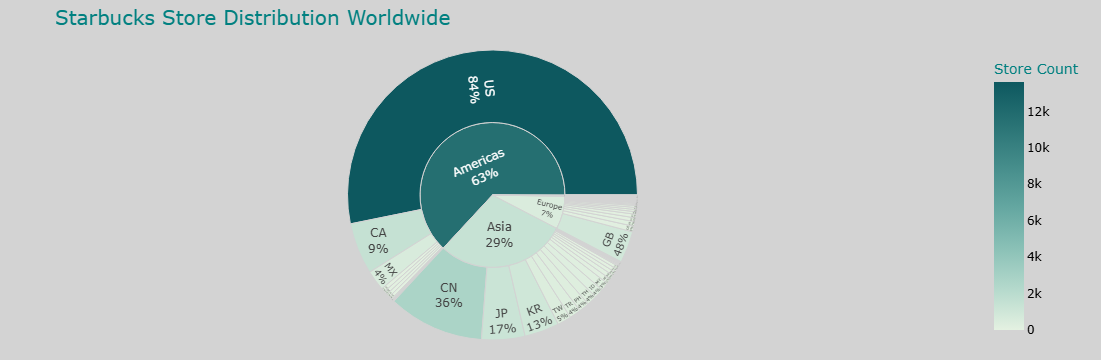

In [61]:
#ChatGPT helped figure out the intricacies of Sunburst Plots and how to Customize them, Thanks ChatGPT! :))
# Step 4: Create a Sunburst Plot
fig1 = px.sunburst(df3, path=["region", "country"], values="store_count",
                  title="Starbucks Store Distribution by Region and Country",
                  color="store_count", color_continuous_scale="mint")
fig1.update_traces(textinfo="label+percent parent", hoverinfo="label+value", marker_colorbar_title_text='Store Count')

fig1.update_layout(title=dict(text="Starbucks Store Distribution Worldwide", 
                             font=dict(size=20, color="teal")),
                  paper_bgcolor="lightgray", font_color="black",
                  margin=dict(t=50, l=20, r=20, b=20), coloraxis_colorbar_title_text='Store Count', coloraxis_colorbar_title_font_color="teal")
fig1.show()
#interesting View About This Chart is that China (2734) has about the same amount of stores as California (2821)

In [11]:
query = text("""SELECT 
                region, 
                country, 
                COUNT(*) as store_count
            FROM 
                starbucks_store_locations
            WHERE
                Country != 'US'
            GROUP BY 
                region, 
                country
""")
df4 = pd.read_sql(query, con=conn)
df4

,region,country,store_count
0,Africa,EG,18
1,Africa,MA,9
2,Africa,ZA,3
3,Americas,AR,108
4,Americas,AW,3
...,...,...,...
67,Europe,RU,109
68,Europe,SE,18
69,Europe,SK,3
70,Oceania,AU,22


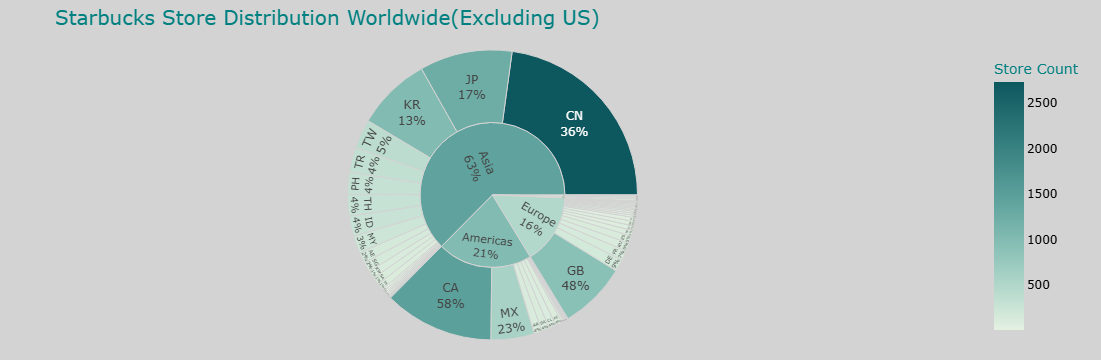

In [60]:

# Step 4: Create a Sunburst Plot
fig2 = px.sunburst(df4, path=["region", "country"], values="store_count",
                  title="Starbucks Store Distribution by Region and Country",
                  color="store_count", color_continuous_scale="mint")

fig2.update_traces(textinfo="label+percent parent", hoverinfo="label+value", marker_colorbar_title_text='Store Count')

fig2.update_layout(title=dict(text="Starbucks Store Distribution Worldwide(Excluding US)", 
                             font=dict(size=20, color="teal")),
                  paper_bgcolor="lightgray", font_color="black",
                  margin=dict(t=50, l=20, r=20, b=20), coloraxis_colorbar_title_text='Store Count', coloraxis_colorbar_title_font_color="teal")
fig2.show()

# Close Session

In [ ]:
# Close Session
session.close()
engine.dispose